In [61]:
import pandas as pd

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss

from math import exp

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def sigmoid(a):
    return 1/(1 + exp(-a))


In [ ]:
df = pd.read_csv('gbm-data.csv')

y = df.Activity
df = df.drop('Activity', axis=1)

df.head()

In [80]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.8, random_state=241)

learning_rates = [1, 0.5, 0.3, 0.2, 0.1]

clf = GradientBoostingClassifier(n_estimators=250, random_state=241, learning_rate=0.2)
clf.fit(X_train, y_train)

# quality on test set
iterations = clf.staged_decision_function(X_test)
test_loss = []


for i in iterations:
    y_pred = list(map(lambda x: sigmoid(x), i))
    test_loss.append(log_loss(y_test, y_pred))
     

# quality on train set
iterations = clf.staged_decision_function(X_train)
train_loss = []


for i in iterations:
    y_pred = list(map(lambda x: sigmoid(x), i))
    train_loss.append(log_loss(y_train, y_pred))

In [93]:
clf2 = RandomForestClassifier(random_state=241, n_estimators=36)
clf2.fit(X_train, y_train)

y_pred_forest = clf2.predict_proba(X_test)
vals = list(map(lambda x: x[1], y_pred_forest))

log_loss(y_test, vals)


0.54138128618040693

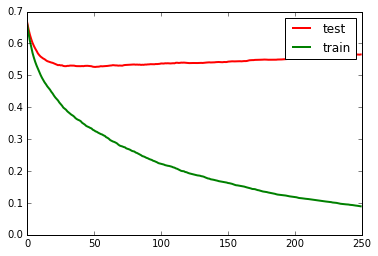

In [27]:
# learning rate 0.1
plt.figure()
plt.plot(test_loss, 'r', linewidth=2)
plt.plot(train_loss, 'g', linewidth=2)
plt.legend(['test', 'train'])

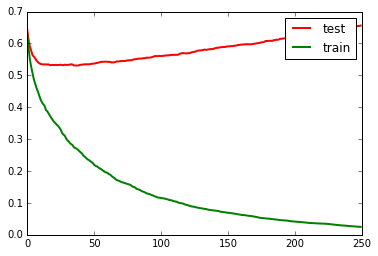

In [81]:
# learning rate 0.2
plt.figure()
plt.plot(test_loss, 'r', linewidth=2)
plt.plot(train_loss, 'g', linewidth=2)
plt.legend(['test', 'train'])

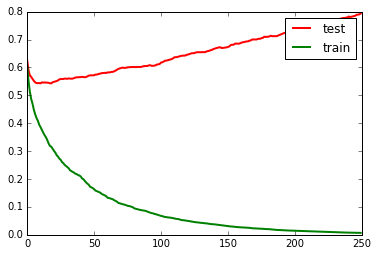

In [23]:
# learning rate 0.3
plt.figure()
plt.plot(test_loss, 'r', linewidth=2)
plt.plot(train_loss, 'g', linewidth=2)
plt.legend(['test', 'train'])

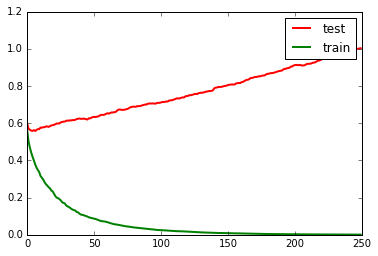

In [20]:
# learning rate 0.5
plt.figure()
plt.plot(test_loss, 'r', linewidth=2)
plt.plot(train_loss, 'g', linewidth=2)
plt.legend(['test', 'train'])

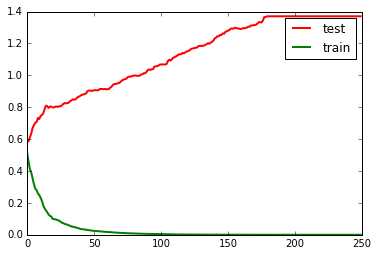

In [17]:
# learning rate 1
plt.figure()
plt.plot(test_loss, 'r', linewidth=2)
plt.plot(train_loss, 'g', linewidth=2)
plt.legend(['test', 'train'])

In [84]:
loss_series = pd.Series(test_loss)

print('min index ', loss_series.argmin())
print('min val ', loss_series[36])

loss_series.min()

min index  36
min val  0.530918156803


0.53091815680290511

In [75]:
f = open('1.txt','w')
f.write('overfitting') 
f.close()

In [85]:
f = open('2.txt','w')
f.write('0.53 36') 
f.close()

In [87]:
f = open('3.txt','w')
f.write('0.54') 
f.close()